# Prediction using Decision Tree Algorithm

# GRIP - The Sparks Foundation

## PLOTTING DECISION TREE

## AUTHOR


SHREYASH UPADHYAYA https://www.linkedin.com/in/shreyash24/

### IMPORTING THE LIBRARIES

In [1]:
# Libraries used for Data Manipulation, Analysis & Cleaning

import pandas as pd
import numpy as np

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

### LOADING THE DATA

In [2]:
df = pd.read_csv('Iris.csv', index_col = 0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### EXPLORATORY DATA ANALYSIS

In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64


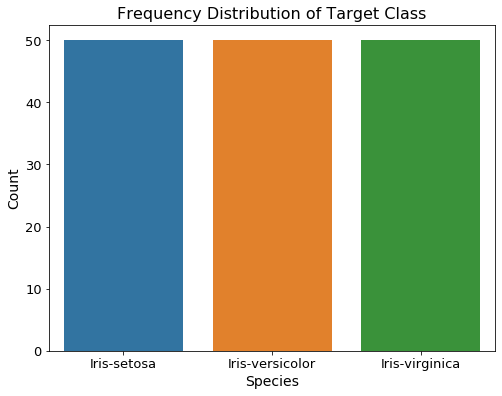

In [6]:
# Frequency Distribution of Target Class

print(df['Species'].value_counts())

plt.figure(figsize = (8,6))
sns.countplot(df['Species']);
plt.title('Frequency Distribution of Target Class', fontsize = 16)
plt.xlabel('Species', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.show()

### Converting the Categorical Data to Numeric Data

#### Using Label Encoder Technique

In [7]:
df1 = df.copy()
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df1['Species'])
df1['Species'] = le.transform(df1['Species'])

le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


### X & Y SPLIT

In [10]:
X = df1.iloc[:,:-1].values
Y = df1.iloc[:,-1].values

### TRAIN & TEST SPLIT

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 10)

## DECISION TREE CLASSIFIER

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

### PLOTTING THE DECISION TREE

#### Method I

Text(0.5, 1.0, 'Decision Tree')

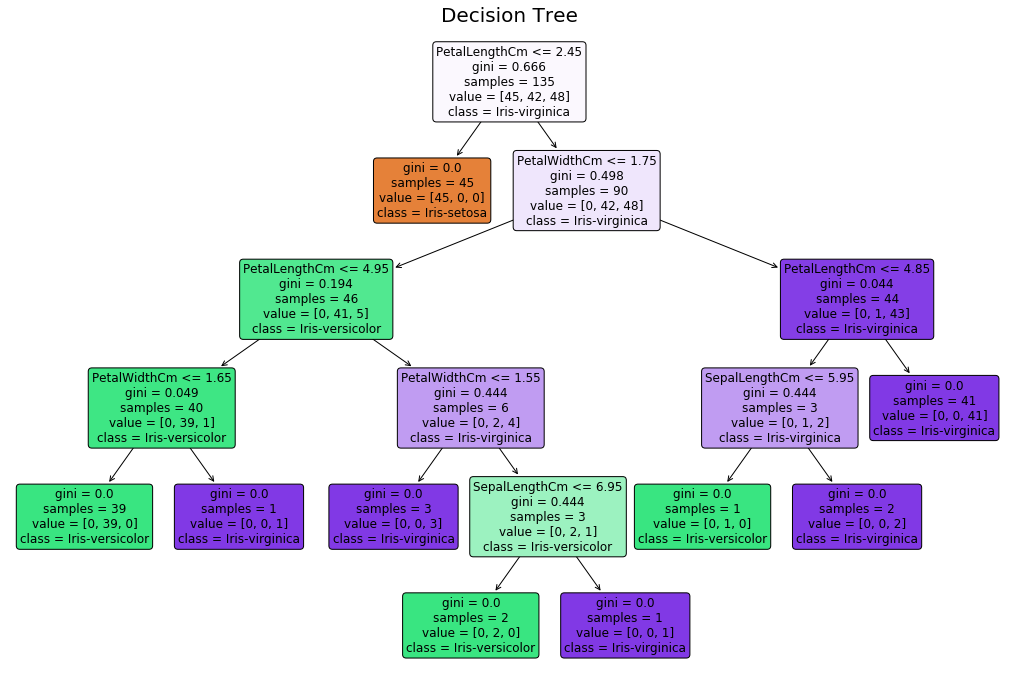

In [14]:
from sklearn import tree
plt.figure(figsize = (18,12))
tree.plot_tree(dt, feature_names = df1.columns[:-1], class_names = le.classes_, filled = True, fontsize = 12, rounded = True);
plt.title('Decision Tree', fontsize = 20)

#### Method II

In [18]:
#plotting the tree
# open url -> http://webgraphviz.com/
# & paste the file

#creating the file with all information
with open('model_DecisionTree.txt', 'w') as f:
    
    f = tree.export_graphviz(dt, feature_names = df1.columns[:-1], filled = True,
                             rounded = True, out_file = f)

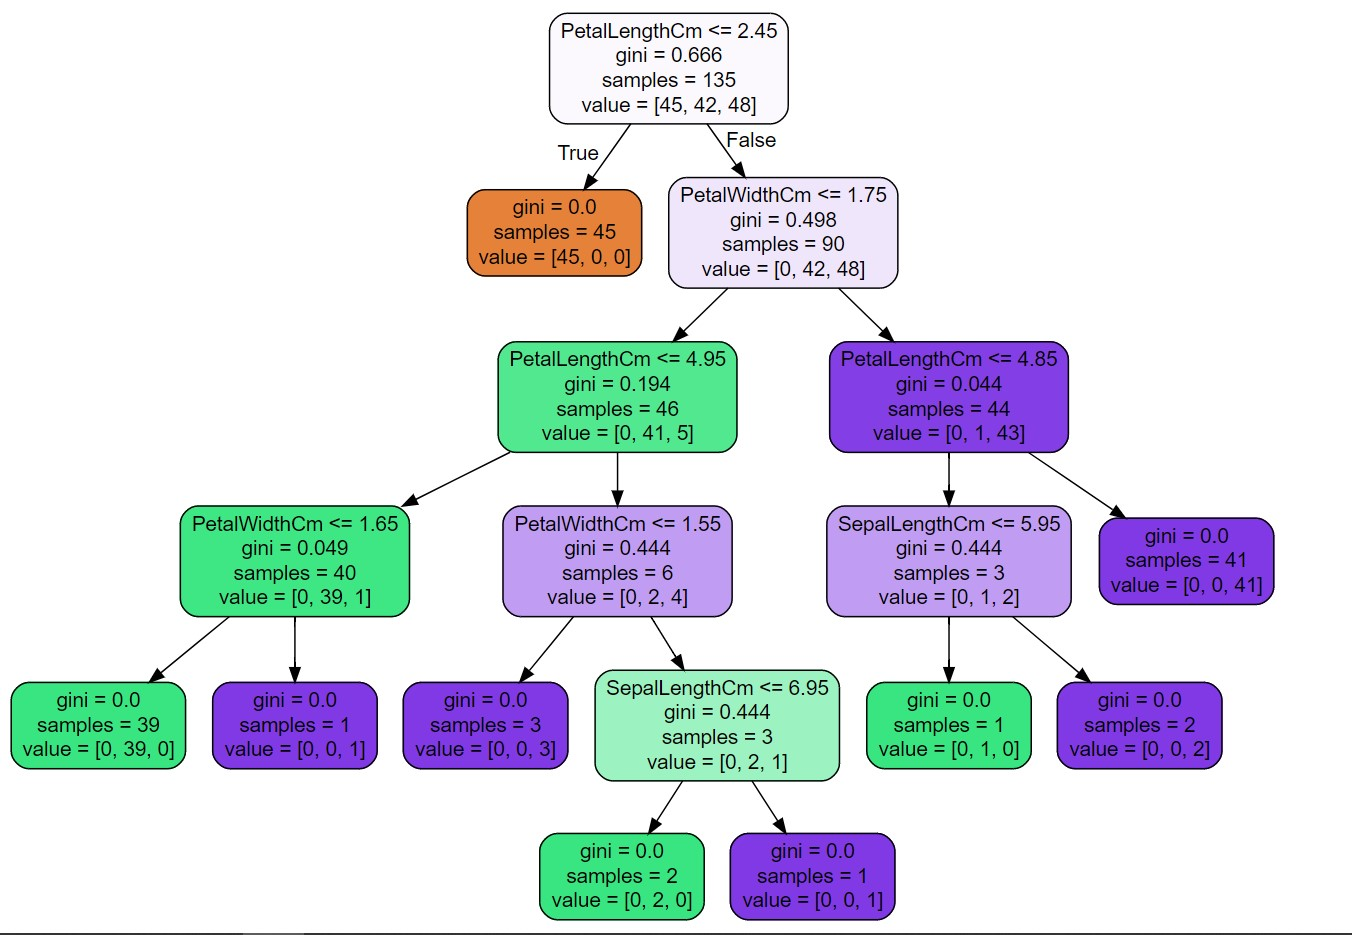

In [19]:
from IPython.display import Image
Image("decision tree.jpg")

### MODEL EVALUATION

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

Y_pred = dt.predict(X_test)
print(confusion_matrix(Y_test, Y_pred),'\n')
print('CLASSIFICATION REPORT\n',classification_report(Y_test, Y_pred),'\n')
print('ACCURACY OF MODEL :', round(accuracy_score(Y_test, Y_pred),4))

[[5 0 0]
 [0 8 0]
 [0 0 2]] 

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15
 

ACCURACY OF MODEL : 1.0
